
# AutoEncoders on Image Data

## The Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


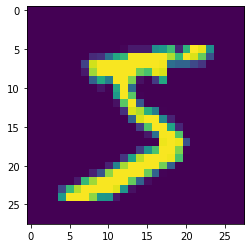

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0].shape

(28, 28)

## Basic AutoEncoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid")) #Possible output -- 0 / 1
decoder.add(Reshape([28, 28]))

In [ ]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 421,384
Trainable params: 421,384
Non-trainable params: 0
________________________________________________

In [ ]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2990 - accuracy: 0.0696 - val_loss: 0.2144 - val_accuracy: 0.1208
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2012 - accuracy: 0.1402 - val_loss: 0.1682 - val_accuracy: 0.1843
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1670 - accuracy: 0.1889 - val_loss: 0.1550 - val_accuracy: 0.2018
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1531 - accuracy: 0.2072 - val_loss: 0.1441 - val_accuracy: 0.2177
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1449 - accuracy: 0.2186 - val_loss: 0.1369 - val_accuracy: 0.2227


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

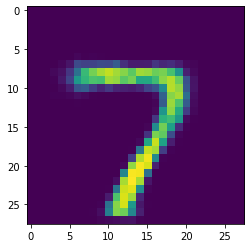

In [ ]:
plt.imshow(passed_images[0])

In [ ]:
latentSpaceForNumber_7= encoder.predict(X_test[:10])  #What output will I get from here?


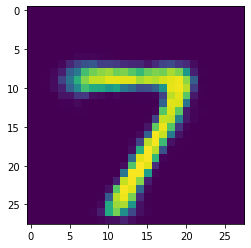

In [ ]:
finalDataFromDecoder = decoder.predict(latentSpaceForNumber_7)

plt.imshow(finalDataFromDecoder[0])

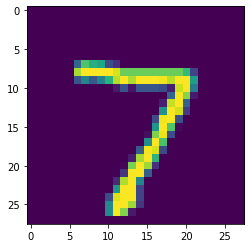

In [ ]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



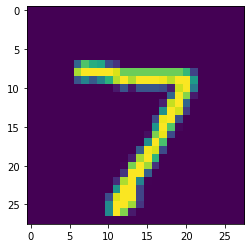

In [ ]:
plt.imshow(X_test[0])

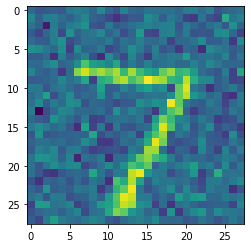

In [ ]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1696 - accuracy: 0.1818 - val_loss: 0.1339 - val_accuracy: 0.2277
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1300 - accuracy: 0.2312 - val_loss: 0.1204 - val_accuracy: 0.2422
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1208 - accuracy: 0.2452 - val_loss: 0.1135 - val_accuracy: 0.2552
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.2543 - val_loss: 0.1088 - val_accuracy: 0.2667
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1115 - accuracy: 0.2609 - val_loss: 0.1062 - val_accuracy: 0.2630
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1091 - accuracy: 0.2648 - val_loss: 0.1045 - val_accuracy: 0.2640
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.2694 - val_loss: 0.1043 - val_accuracy: 0.2701

In [ ]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


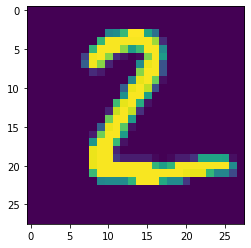

The Noisey Version


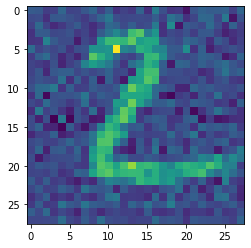

After going through denoiser


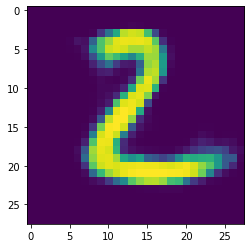

In [ ]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()